In [29]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from matplotlib import cm
cmap = matplotlib.colormaps.get_cmap('viridis_r')

# Ignore warning
import warnings
import logging

logging.getLogger('matplotlib').setLevel(logging.ERROR)
warnings.filterwarnings("ignore",category=matplotlib.MatplotlibDeprecationWarning)

# Get plot params

from plot_params import params
pylab.rcParams.update(params)

# Set default colors to load at will
cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
import wandb

In [4]:
! wandb login

wandb: Currently logged in as: smsharma. Use `wandb login --relogin` to force relogin


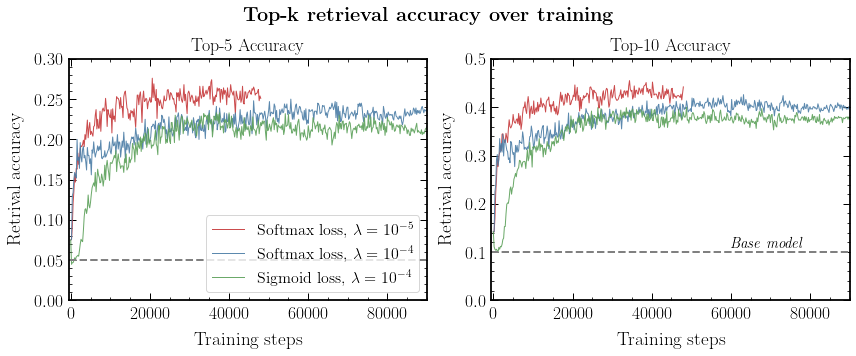

In [74]:
import matplotlib.pyplot as plt
import wandb
import numpy as np

# Assuming 'run_labels' contains the names of the runs you are interested in
# Define it based on your requirements
run_labels = ['ancient-armadillo-88', 
              "ethereal-disco-89",
              'good-vortex-92']

run_legends = ['Sigmoid loss, $\lambda = 10^{-4}$', 
              "Softmax loss, $\lambda = 10^{-4}$",
              'Softmax loss, $\lambda = 10^{-5}$']

# Creating the dictionary
run_dict = {run_labels[i]: run_legends[i] for i in range(len(run_labels))}

api = wandb.Api()
runs = api.runs("smsharma/multimodal-hubble")

# Initialize dictionaries to hold the data for plotting
top5_data = {}
top10_data = {}

for run in runs:
    if run.name in run_labels:
        
        # Fetch history for top 5 and top 10 accuracy
        history_top5 = run.history(keys=["val/top_5_accuracy"])
        history_top10 = run.history(keys=["val/top_10_accuracy"])  # assuming this key exists

        # Store the data for later plotting
        top5_data[run.name] = (history_top5['_step'], history_top5['val/top_5_accuracy'])
        top10_data[run.name] = (history_top10['_step'], history_top10['val/top_10_accuracy'])  # replace with correct key if different

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Top 5 Accuracy
for idx, (run_name, (steps, accuracy)) in enumerate(top5_data.items()):
    axes[0].plot([0] + list(200 * np.arange(1, len(steps) + 1)), [0.075] + list(accuracy), label=run_dict[run_name], lw=1)  # replace with correct key if different

axes[0].set_title("Top-5 Accuracy")
axes[0].set_xlabel("Training steps")
axes[0].set_ylabel("Retrival accuracy")
axes[0].axhline(0.05, color='grey', ls='--', lw=2)
axes[0].set_ylim(0, 0.3)
axes[0].set_xlim(-500, 90_000)

# Plot for Top 10 Accuracy
for run_name, (steps, accuracy) in top10_data.items():
    axes[1].plot([0] + list(200 * np.arange(1, len(steps) + 1)), [0.1419999897480011] + list(accuracy), label=run_dict[run_name], lw=1)  # replace with correct key if different

axes[1].set_title("Top-10 Accuracy")
axes[1].set_xlabel("Training steps")
axes[1].set_ylabel("Retrival accuracy")
axes[1].axhline(0.1, color='grey', ls='--', lw=2)
axes[1].set_ylim(0, 0.5)
axes[1].set_xlim(-500, 90_000)
axes[1].text(60_000, 0.11, "\emph{Base model}", fontsize=15)
    
fig.suptitle(r"\textbf{Top-k retrieval accuracy over training}", fontsize=20)
axes[0].legend(frameon=True, framealpha=0.8, fontsize=16)

plt.tight_layout()
plt.savefig("../paper/plots/retrieval_acc.pdf")